In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

#load the dataset

In [134]:
train_df = pd.read_csv('/content/mnist_train.csv')
test_df = pd.read_csv('/content/mnist_test (1).csv')

# Prepare the data

In [157]:
X_train = train_df.drop('label', axis=1) / 255.0
y_train = train_df['label']
X_test = test_df.drop('label', axis=1) / 255.0
y_test = test_df['label']

Handle NaN values in y_train (target variable) before splitting
You can either drop rows with NaN values or impute them.
Here, we'll drop rows with NaN in y_train:

#split the data

In [159]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

# Hyperparameter tuning for Logistic Regression

In [161]:
logreg_params = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'saga']}
logreg = GridSearchCV(LogisticRegression(max_iter=1000), logreg_params, cv=5, n_jobs=-1)

# Hyperparameter tuning for MLP Classifier

In [162]:
mlp_params = {'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']}
mlp = GridSearchCV(MLPClassifier(max_iter=500), mlp_params, cv=5, n_jobs=-1)

# Hyperparameter tuning for KNN Classifier

In [163]:
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1)

#Initialize models

In [164]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(max_iter=500),
    'KNN': KNeighborsClassifier()
}

In [165]:
imputer = SimpleImputer(strategy='mean')

In [166]:
imputer.fit(X_train_split)

SimpleImputer()

In [167]:
X_train_split = imputer.transform(X_train_split)
X_val = imputer.transform(X_val)

In [168]:
train_df = train_df.dropna(subset=['label'])

In [169]:
X_train = train_df.drop('label', axis=1) / 255.0
y_train = train_df['label']

In [170]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Train and evaluate models

In [171]:
results = {}
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    results[name] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_pred))

Logistic Regression Accuracy: 0.8877
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       983
         1.0       0.91      0.95      0.93      1073
         2.0       0.89      0.86      0.87       948
         3.0       0.86      0.85      0.85       994
         4.0       0.89      0.90      0.89       953
         5.0       0.82      0.81      0.82       851
         6.0       0.92      0.93      0.93       988
         7.0       0.93      0.90      0.91      1016
         8.0       0.84      0.81      0.83       879
         9.0       0.84      0.88      0.86       951

    accuracy                           0.89      9636
   macro avg       0.89      0.89      0.89      9636
weighted avg       0.89      0.89      0.89      9636

MLP Accuracy: 0.9163
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       983
         1.0       0.93      0.97      0.95      1073
         2.0       0

## Compare models

In [172]:
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                     accuracy  precision    recall  f1-score
Logistic Regression  0.887713   0.887523  0.887713  0.887431
MLP                  0.916252   0.915969  0.916252  0.915977
KNN                  0.913034   0.916474  0.913034  0.912787


# # Plot comparison

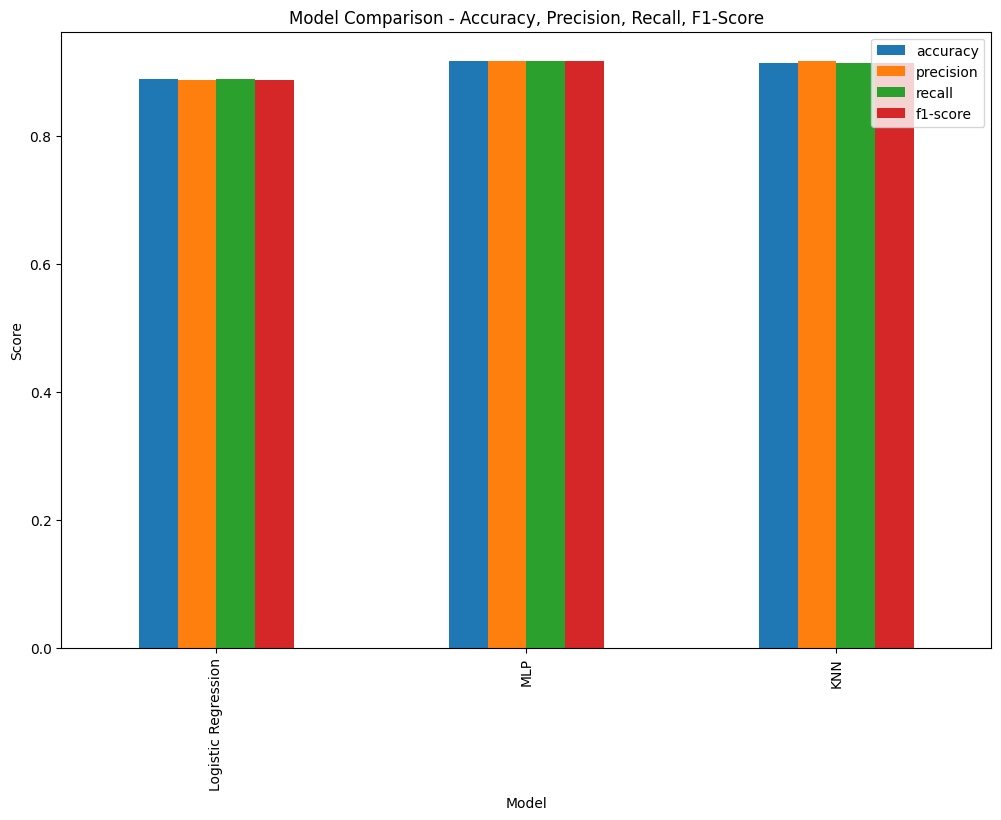

In [173]:
results_df.plot(kind='bar', figsize=(12, 8), title='Model Comparison - Accuracy, Precision, Recall, F1-Score')
plt.xlabel('Model')
plt.ylabel('Score') # Added the missing closing single quote
plt.show()


## Plot confusion matrix

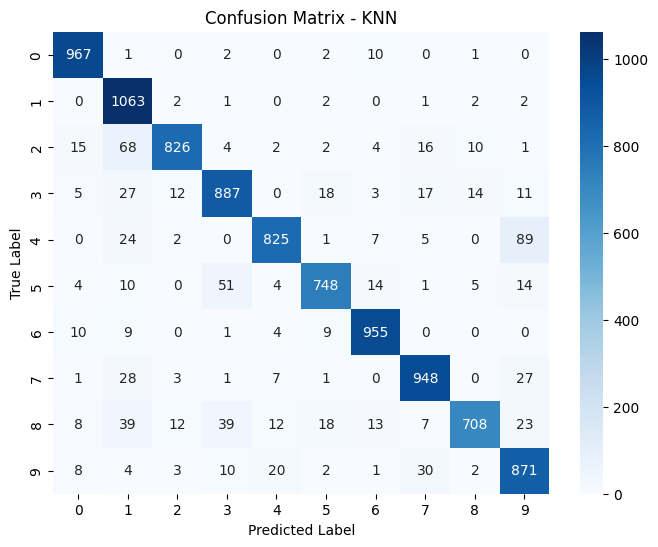

In [175]:
conf_matrix = confusion_matrix(y_val, y_pred) # Assuming you want to visualize validation data

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

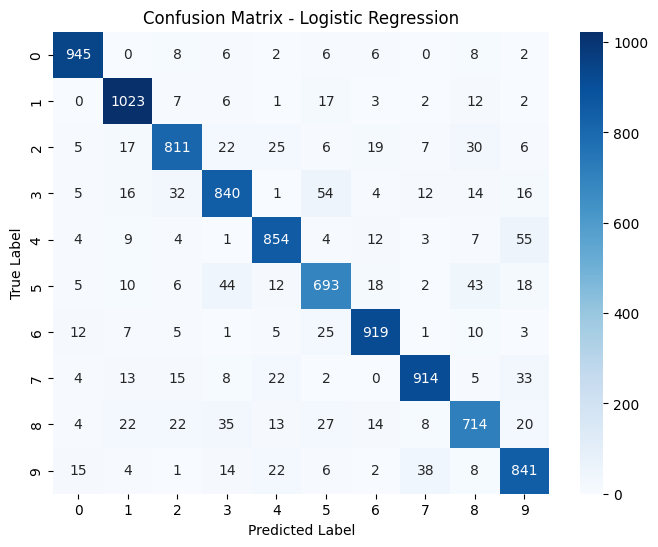

In [176]:
logistic_model = models['Logistic Regression']
y_pred_logistic = logistic_model.predict(X_val)

# Calculate confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_val, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

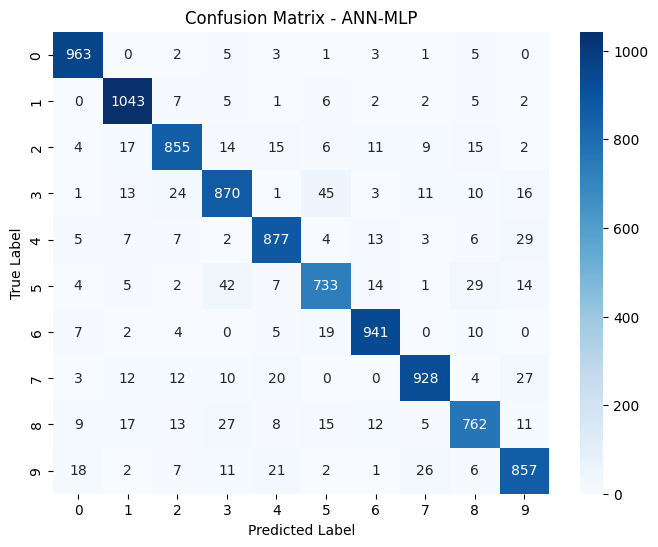

In [177]:
mlp_model = models['MLP']  # Get the trained MLP model
y_pred_mlp = mlp_model.predict(X_val)  # Generate predictions for the validation set

conf_matrix_mlp = confusion_matrix(y_val, y_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ANN-MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()